In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as patches

%matplotlib inline
raw_data= np.random.randint(0,255,(3,100))


[[[ 0.2566839   0.98878848  0.73795257]
  [ 0.81471969  0.85361876  0.40151648]
  [ 0.38527127  0.1320515   0.78750419]
  [ 0.05728794  0.06019827  0.25536233]
  [ 0.09114497  0.95657614  0.09095286]]

 [[ 0.56254912  0.47269144  0.93146939]
  [ 0.73358683  0.81713988  0.55679034]
  [ 0.14195162  0.51147031  0.29250053]
  [ 0.52472204  0.8661845   0.43499269]
  [ 0.46982767  0.21717392  0.10895258]]

 [[ 0.74384224  0.08887899  0.66116933]
  [ 0.24473677  0.25205967  0.89715834]
  [ 0.76835465  0.17338846  0.31676018]
  [ 0.27614209  0.58767543  0.9725419 ]
  [ 0.82874349  0.37061832  0.75691375]]

 [[ 0.64571594  0.51765448  0.61425924]
  [ 0.00296742  0.39065679  0.86543443]
  [ 0.09188365  0.91197184  0.34396731]
  [ 0.99720279  0.31109501  0.49403185]
  [ 0.08373201  0.33353041  0.10019807]]

 [[ 0.83584054  0.38410921  0.27132288]
  [ 0.89399833  0.2130579   0.39434508]
  [ 0.28720182  0.40762422  0.89849816]
  [ 0.01132369  0.29233082  0.46906883]
  [ 0.73038916  0.67176508  0.18

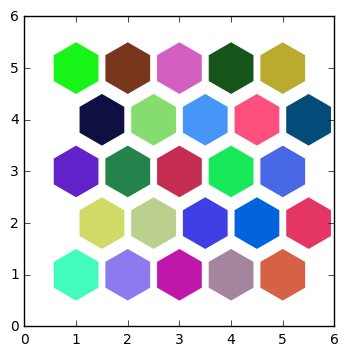

In [18]:
network_dimensions = np.array([5, 5])
n_iterations = 2000
init_learning_rate = 0.01
  
m = raw_data.shape[0]
n = raw_data.shape[1]
  
net = np.random.random((network_dimensions[0], network_dimensions[1], m))
print(net)  
init_radius = max(network_dimensions[0], network_dimensions[1]) / 2
  
time_constant = n_iterations / np.log(init_radius)

fig = plt.figure()

ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim((0, net.shape[0]+1))
ax.set_ylim((0, net.shape[1]+1))



for x in range(1, net.shape[0] + 1):
    for y in range(1, net.shape[1] + 1):
        if (y%2 ==0):
                ax.add_patch(patches.RegularPolygon((x+0.5, y), 6, 0.5,
                     facecolor=net[x-1,y-1,:],
                     edgecolor='none'))
        else:        
            ax.add_patch(patches.RegularPolygon((x, y), 6, 0.5,
                     facecolor=net[x-1,y-1,:],
                     edgecolor='none'))
plt.show()

In [20]:
    
    data = raw_data

    
    data = raw_data / data.max()
    
    
t = data[:, np.random.randint(0, n)].reshape(np.array([m, 1]))


In [21]:
#     bmu_idx = np.array([0, 0])
#     min_dist = np.iinfo(np.int).max

    
#     for x in range(net.shape[0]):
#         for y in range(net.shape[1]):
#             w = net[x, y, :].reshape(m, 1)
#             print("weight:")
#             print(w)
#             sq_dist = np.sum((w - t) ** 2)
#             if sq_dist < min_dist:
#                 min_dist = sq_dist
#                 bmu_idx = np.array([x, y])
#                 print("Min Dist")
#                 print(min_dist)
#                 print("BMU_INDEX")
#                 print(bmu_idx)
    
    
#     bmu = net[bmu_idx[0], bmu_idx[1], :].reshape(m, 1)
#     print(bmu)
#     print(bmu_idx)

In [22]:
def find_bmu(t, net, m):
   
    bmu_idx = np.array([0, 0])
    
    min_dist = np.iinfo(np.int).max
    
    for x in range(net.shape[0]):
        for y in range(net.shape[1]):
            w = net[x, y, :].reshape(m, 1)
            
            sq_dist = np.sum((w - t) ** 2)
            if sq_dist < min_dist:
                min_dist = sq_dist
                bmu_idx = np.array([x, y])
    
    bmu = net[bmu_idx[0], bmu_idx[1], :].reshape(m, 1)
    
    return (bmu, bmu_idx)

In [23]:
def decay_radius(initial_radius, i, time_constant):
    return initial_radius * np.exp(-i / time_constant)

def decay_learning_rate(initial_learning_rate, i, n_iterations):
    return initial_learning_rate * np.exp(-i / n_iterations)
def calculate_influence(distance, radius):
    return np.exp(-distance / (2* (radius**2)))


In [24]:
for i in range(n_iterations):
    t = data[:, np.random.randint(0, n)].reshape(np.array([m, 1]))
    
    bmu, bmu_idx = find_bmu(t, net, m)
    
    r = decay_radius(init_radius, i, time_constant)
    l = decay_learning_rate(init_learning_rate, i, n_iterations)
    
    for x in range(net.shape[0]):
        for y in range(net.shape[1]):
            w = net[x, y, :].reshape(m, 1)
            w_dist = np.sum((np.array([x, y]) - bmu_idx) ** 2)
            if w_dist <= r**2:
                influence = calculate_influence(w_dist, r)
                new_w = w + (l * influence * (t - w))
                net[x, y, :] = new_w.reshape(1, 3)

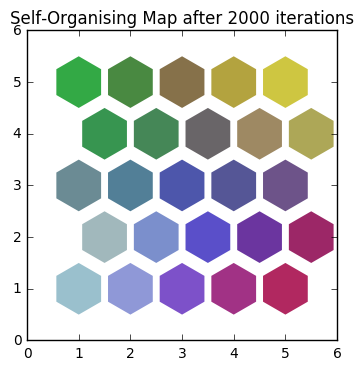

In [25]:
fig = plt.figure()

ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim((0, net.shape[0]+1))
ax.set_ylim((0, net.shape[1]+1))
ax.set_title('Self-Organising Map after %d iterations' % n_iterations)


for x in range(1, net.shape[0] + 1):
    for y in range(1, net.shape[1] + 1):
        if (y%2 ==0):
                ax.add_patch(patches.RegularPolygon((x+0.5, y), 6, 0.5,
                     facecolor=net[x-1,y-1,:],
                     edgecolor='none'))
        else:        
            ax.add_patch(patches.RegularPolygon((x, y), 6, 0.5,
                     facecolor=net[x-1,y-1,:],
                     edgecolor='none'))
plt.show()